# K-Means Clustering

## 1. Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## 2. Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3,4]].values

## 3. Implementing the elbow method to find the optimal number of clusters

In [3]:
sum_of_squares = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(x)
    sum_of_squares.append(km.inertia_)

/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

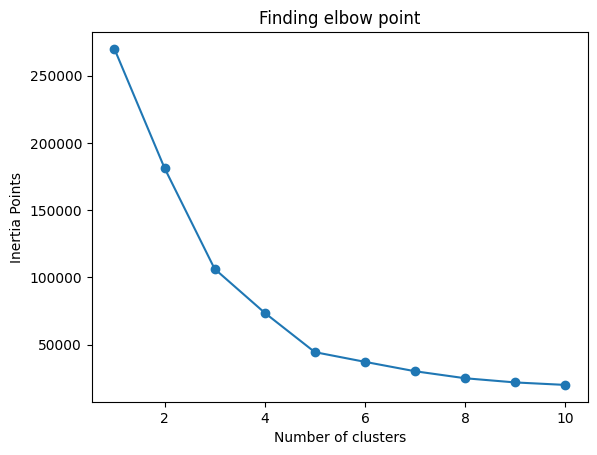

In [4]:
plt.plot(range(1, 11), sum_of_squares, marker='o')
plt.title('Finding elbow point')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Points')
plt.show()

## 4. Training the k-means model on the dataset

In [5]:
optimal_point = 5
kms = KMeans(n_clusters=optimal_point, init='k-means++', random_state=42)
y_means = kms.fit_predict(x)

/home/ugochukwu/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 5: Calculate silhouette score for validation

In [6]:
sil_avg  = silhouette_score(x, y_means)
print(f"Silhouette Score for {optimal_point} clusters: {sil_avg: .2f}")

Silhouette Score for 5 clusters:  0.55


## 6. Visualizing the clusters

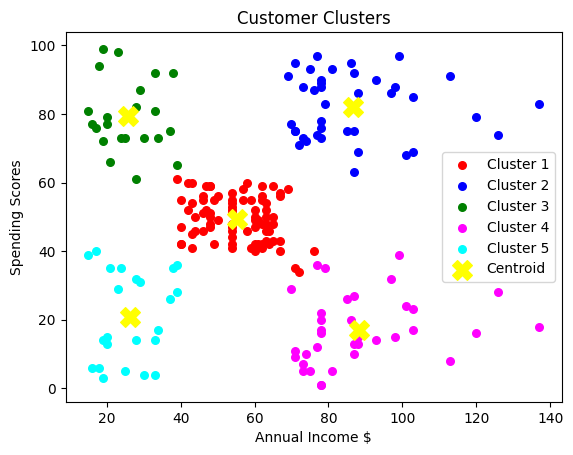

In [7]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=30, c='red', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=30, c='blue', label='Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=30, c='green', label='Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=30, c='magenta', label='Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=30, c='cyan', label='Cluster 5')
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], s=200, c='yellow', label='Centroid', marker='X')
plt.title('Customer Clusters')
plt.xlabel('Annual Income $')
plt.ylabel('Spending Scores')
plt.legend()
plt.show()